In [2]:
import math
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

!pip install physics-tenpy
# from tenpy.models import lattice
import tenpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
N = 3
b = [ [5, 8, 11], [13, 9, 6], [3, 14, 1] ]
assert len(b) == N
def vector_length(v):
    return math.sqrt(sum([v[i]**2 for i in range(N)]))
def vector_string(v):
    return ', '.join(map(lambda x: f"{0.4*x}", v))


for i, v in enumerate(b):
    print (f"Vector #{i + 1} length: {0.4*vector_length(v)}")
m = {}
for i in range(N):
    for j in range(i):
        vector_i = b[i]
        vector_j = b[j]
        v = sum([c[0]*c[1] for c in zip(vector_i, vector_j)])
        u = sum([c[0]*c[1] for c in zip(vector_j, vector_j)])
        m[(i, j)] = v*1.0/u
        print(f"Coefficient ({i+1},{j+1}) = {v}/{u} = {0.4*v*1.0/u}" )
    b_new = [b[0]]
    print(f"b_1* = b_1 = ({vector_string(b[0])})")
    for i in range(1, N):
        print(f"b_{i+1}* = b_{i+1}")
        s = ""
        for j in range(i):
            s += f"- m_{i+1}{j+1} * b_{j+1}* "
        vector_new = [b[i][a] for a in range(N)]
        for a in range(N):
            for j in range(i):
                vector_new[a] -= m[(i, j)] * b_new[j][a]
        b_new.append(vector_new)
        print(f"{s} = ({vector_string(vector_new)})" )
    for i, v in enumerate(b_new):
        print(f"New vector #{i + 1} length: {0.4*vector_length(v)}")

Vector #1 length: 5.796550698475776
Vector #2 length: 6.764613810115105
Vector #3 length: 5.74108003776293
b_1* = b_1 = (2.0, 3.2, 4.4)
b_2* = b_2


KeyError: (1, 0)

In [4]:
def vector_length(v):
    return math.sqrt(sum([v[i]**2 for i in range(N)]))
a=[1,1]
b=[[1],[1]]
print(np.dot(a, b))

[2]


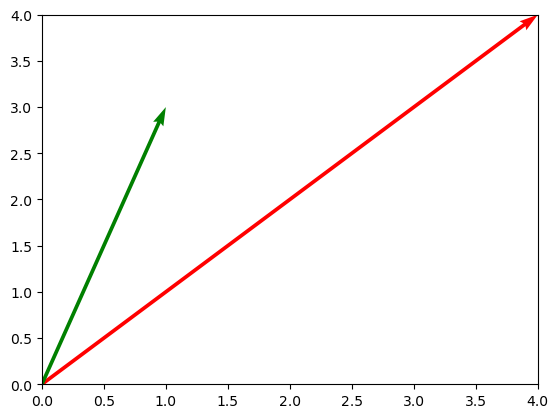

In [5]:
# изобразим базисные вектора
V = np.array([[4,4], [1,3]])
origin = np.array([[0, 0],[0, 0]]) # origin point

fig, ax = plt.subplots()
plt.quiver(*origin, V[:,0], V[:,1], color=['r','g'],angles='xy', scale_units='xy', scale=1)
ax.axis([-0, 4, 0, 4])
plt.show()

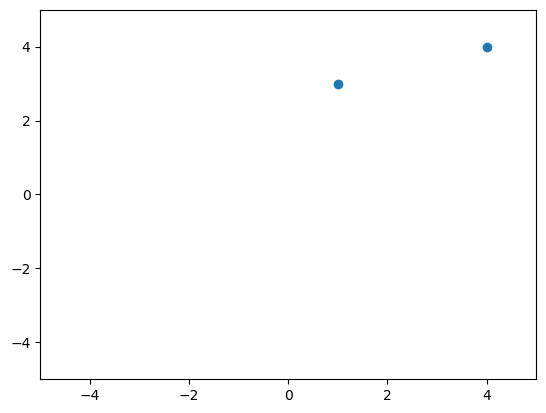

In [6]:
# изобразим элементы точками
fig, ax = plt.subplots()
ax.axis([-5, 5, -5, 5])
plt.scatter(V[:,0],V[:,1])

In [7]:
MyLattice = lattice.Honeycomb
Lu = MyLattice.Lu  # = 2 = the number of sites in the unit cell
fig_args = dict(figsize=(7, 5), dpi=150) 
lat = MyLattice([[4,4], [1,3]] sites=None, bc='periodic')
plt.figure(**fig_args)
ax = plt.gca()
lat.plot_sites(ax)
ax.set_aspect('equal')

lat.plot_basis(ax, origin=-0.5*(lat.basis[0] + lat.basis[1]))
ax.set_xlim(-1)
ax.set_ylim(-1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1062794444.py, line 4)

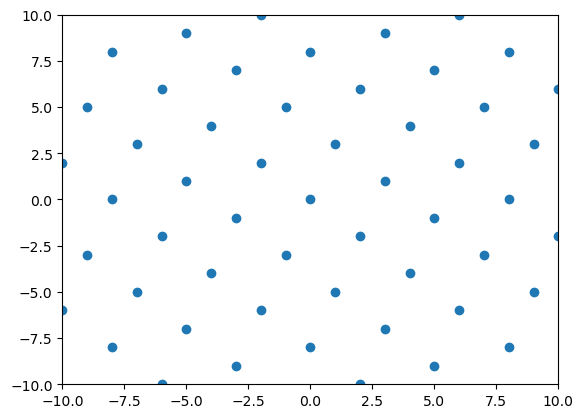

In [53]:
# изобразим элементы точками
#expanding
array = np.array([[0,0]])

vector1 = np.array([[4,4]])
vector2 = np.array([[1,3]])
#линейные комбинации векторов и потом перенесем центр
for i in range(10):
    for j in range(20):
        array=np.append(array,vector1*i+vector2*j,axis=0)
latt=[]
for i in array:
    latt.append((i-5*vector1-10*vector2)[0])
# print(array)
latt = np.array(latt)
# print(latt)

fig, ax = plt.subplots()
ax.axis([-10, 10, -10, 10])
plt.scatter(latt[:,0],latt[:,1])
plt.show()

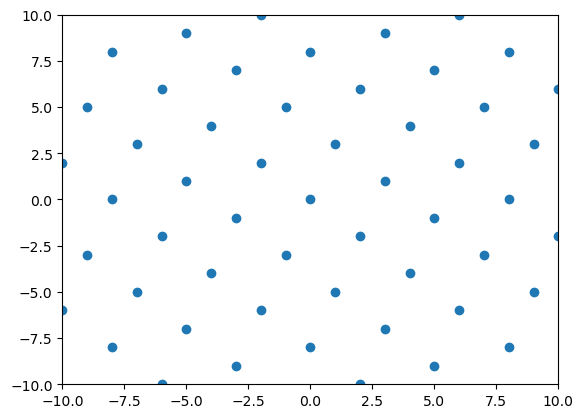

In [54]:
#другой базис решетки [[4,4],[3,1]]
#можно заметить тот же рисунок решетки
array = np.array([[0,0]])

vector1 = np.array([[4,4]])
vector2 = np.array([[3,1]])
#линейные комбинации векторов и потом перенесем центр
for i in range(10):
    for j in range(20):
        array=np.append(array,vector1*i+vector2*j,axis=0)
latt=[]
for i in array:
    latt.append((i-5*vector1-10*vector2)[0])
# print(array)
latt = np.array(latt)
# print(latt)

fig, ax = plt.subplots()
ax.axis([-10, 10, -10, 10])
plt.scatter(latt[:,0],latt[:,1])
plt.show()

In [60]:
#определитель решетки

det=np.dot(vector1[0],vector1[0])*np.dot(vector1[0],vector1[0])-np.dot(vector1[0],vector2[0])*np.dot(vector2[0],vector1[0])
print(det)
res= det**0.5
print(res)

768
27.712812921102035
